<a href="https://colab.research.google.com/github/sirisha-asalla/git/blob/master/londonhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [10]:
from google.colab import files
import io
uploaded = files.upload()
# Use the correct key 'london_houses (2).csv' to access the uploaded file
df = pd.read_csv(io.BytesIO(uploaded['london_houses (7).csv'])) # Changed the key to 'london_houses (2).csv'
df.head()

Saving london_houses.csv to london_houses (7).csv


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [11]:
d=df.copy()


In [12]:
d.columns

Index(['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters',
       'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type',
       'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials',
       'Building Status', 'Price (£)'],
      dtype='object')

In [15]:
d.drop(['Address'],axis=1,inplace=True)

In [16]:
d.isnull().sum()

,0
Neighborhood,0
Bedrooms,0
Bathrooms,0
Square Meters,0
Building Age,0
Garden,0
Garage,0
Floors,0
Property Type,0
Heating Type,0


<Axes: >

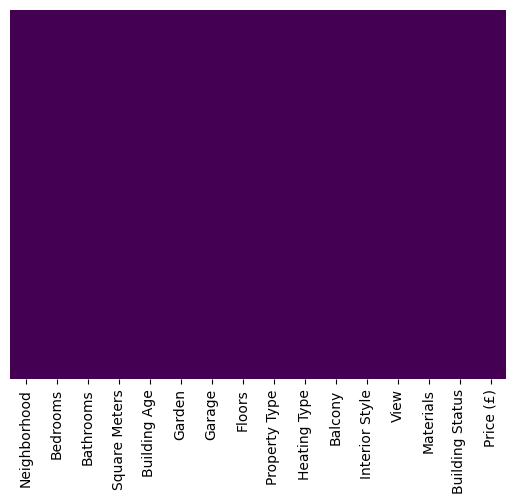

In [17]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

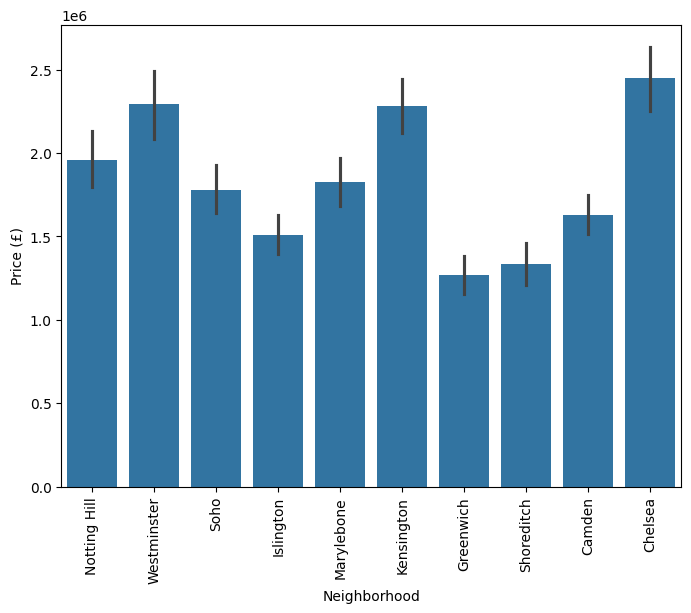

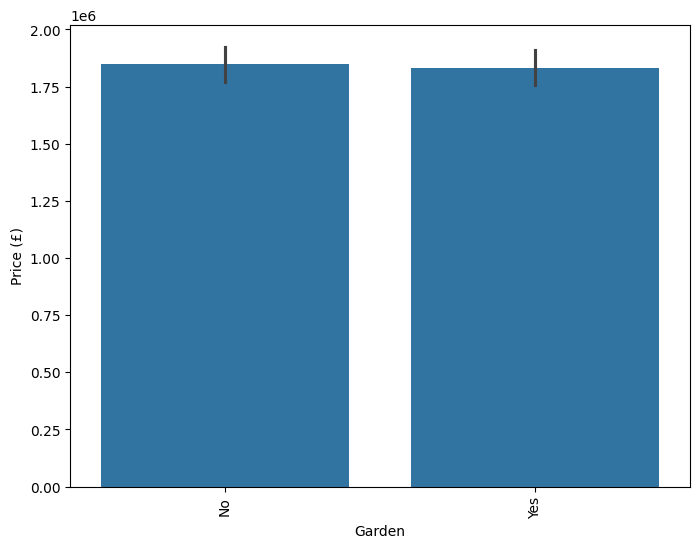

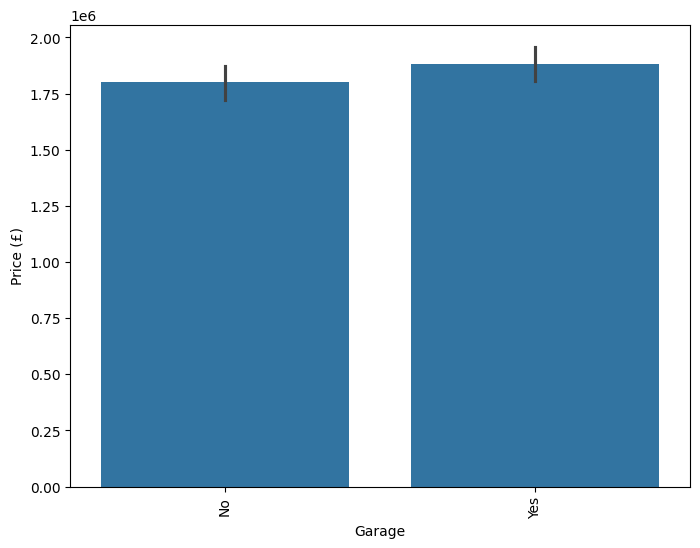

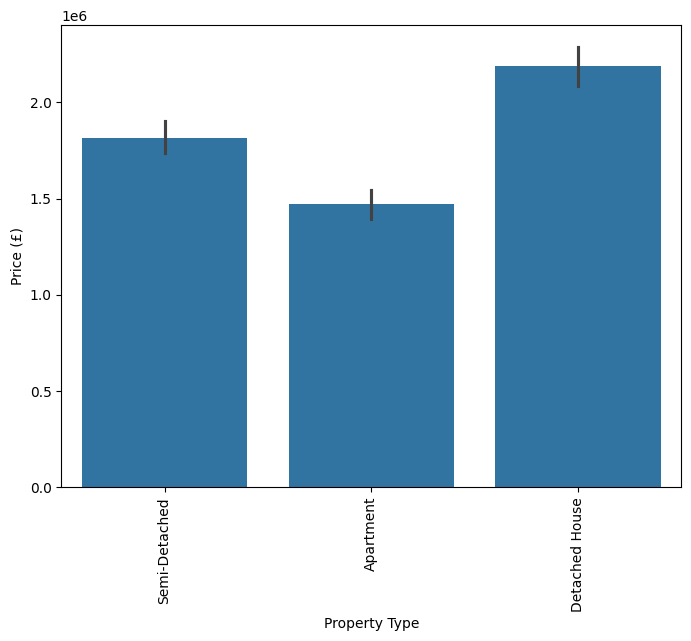

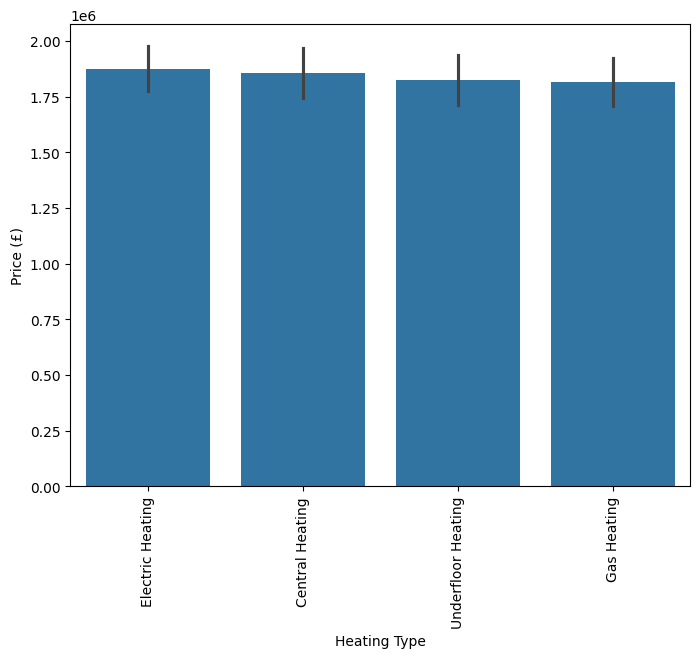

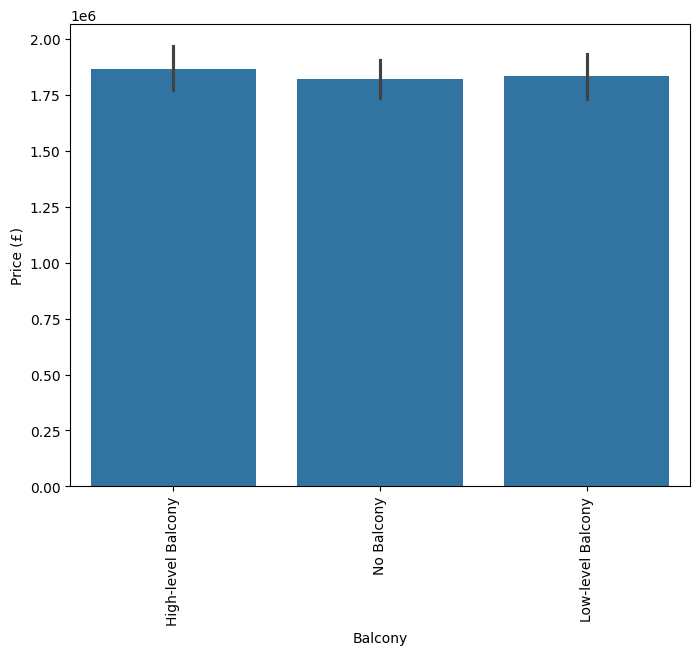

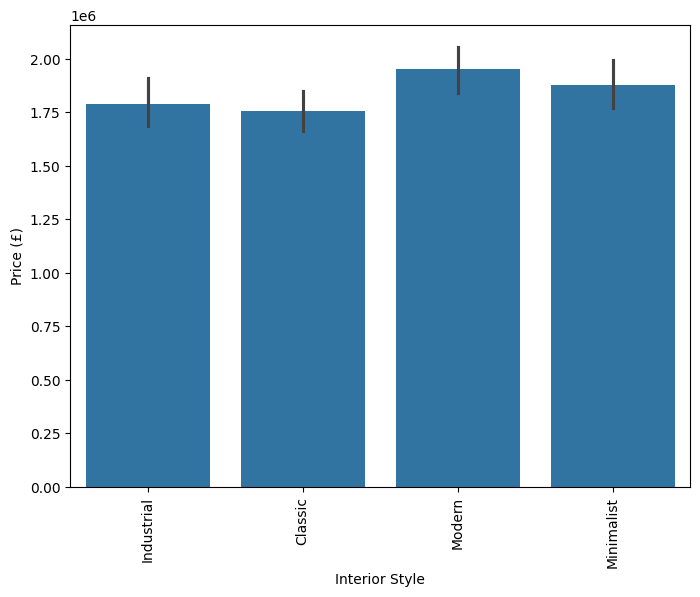

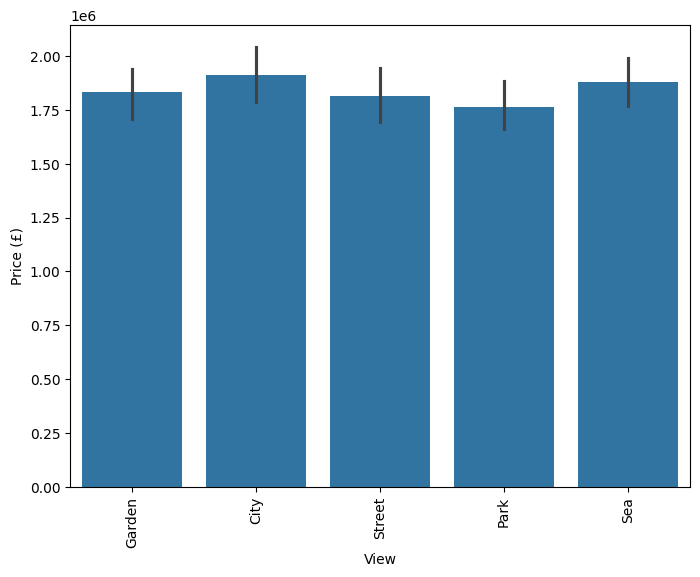

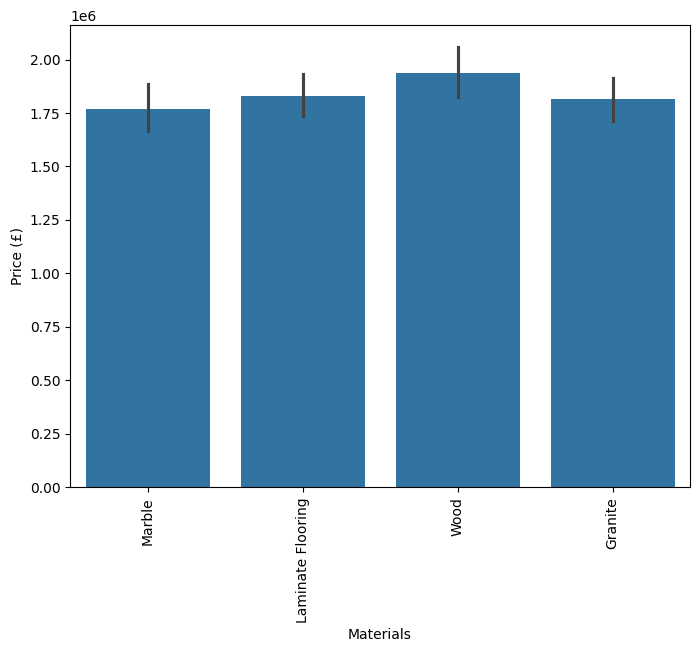

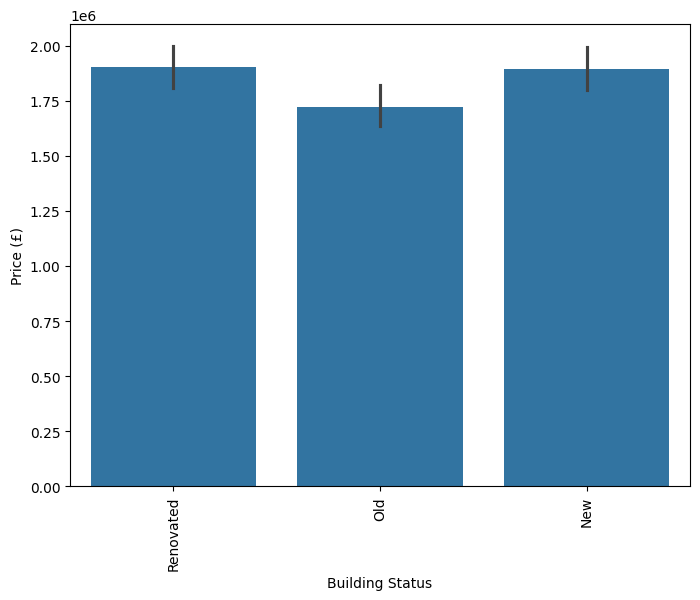

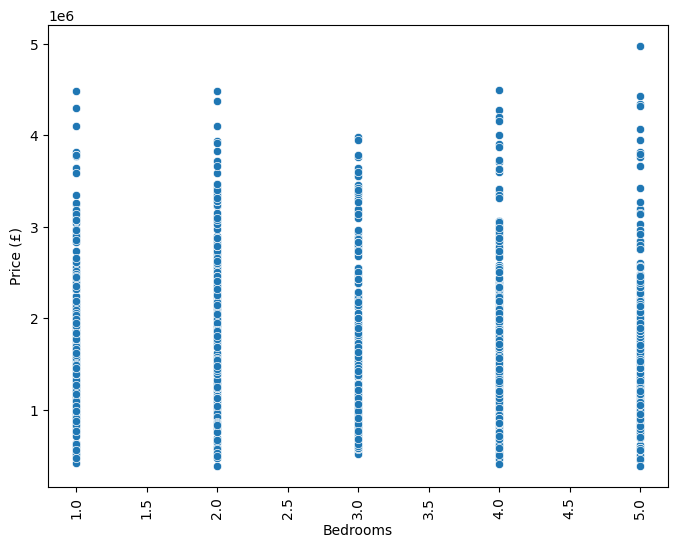

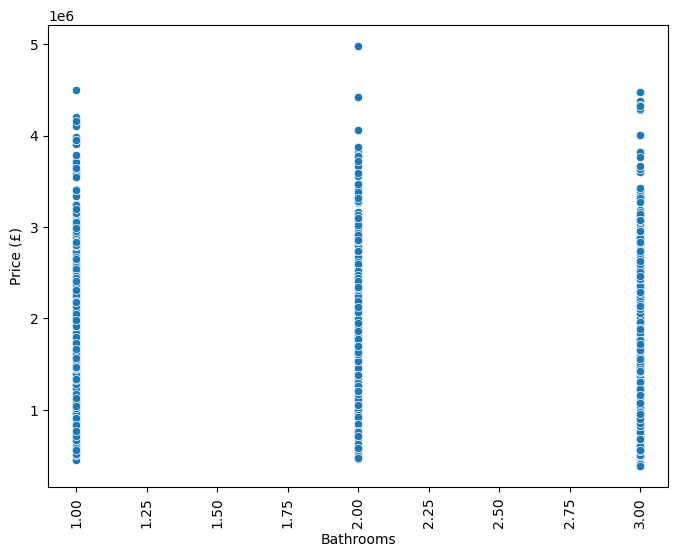

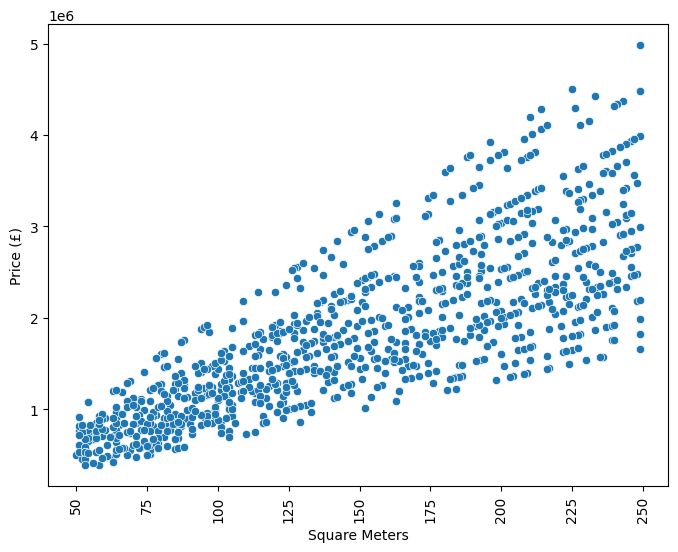

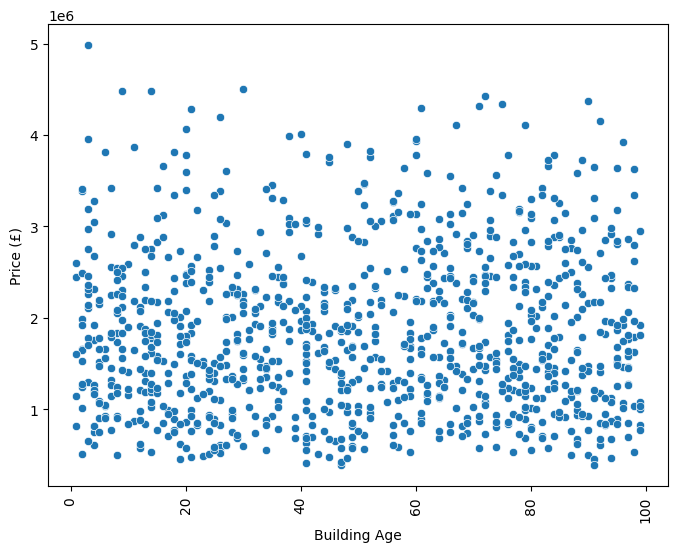

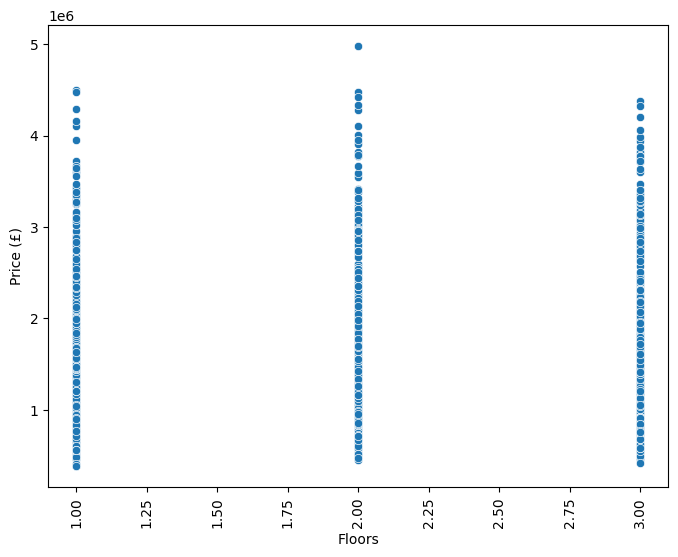

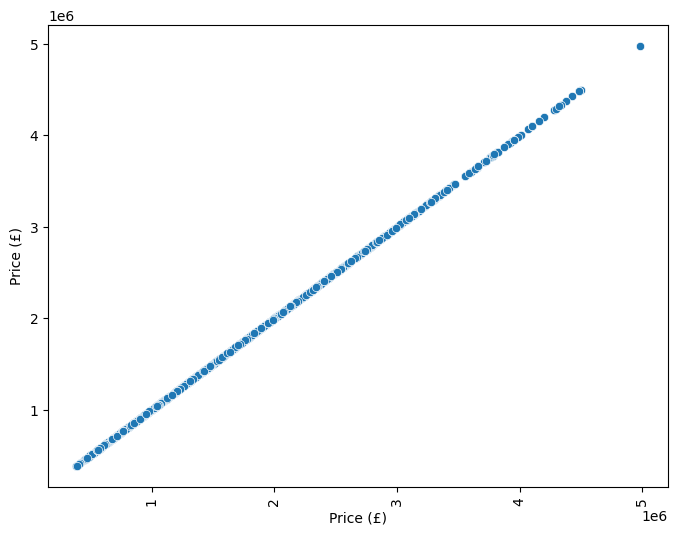

In [27]:
for i in d.columns:
  if(d[i].dtype!='object'):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=d[i],y=d['Price (£)'],data=d)
    plt.xticks(rotation=90)

<Axes: xlabel='Square Meters', ylabel='Price (£)'>

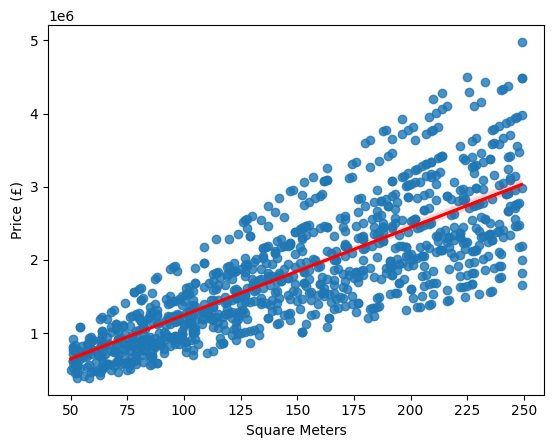

In [28]:
sns.regplot(x=d['Square Meters'],y=d['Price (£)'],data=d,line_kws={'color':'red'})

#EDA

plotting the histogram of each numerical features

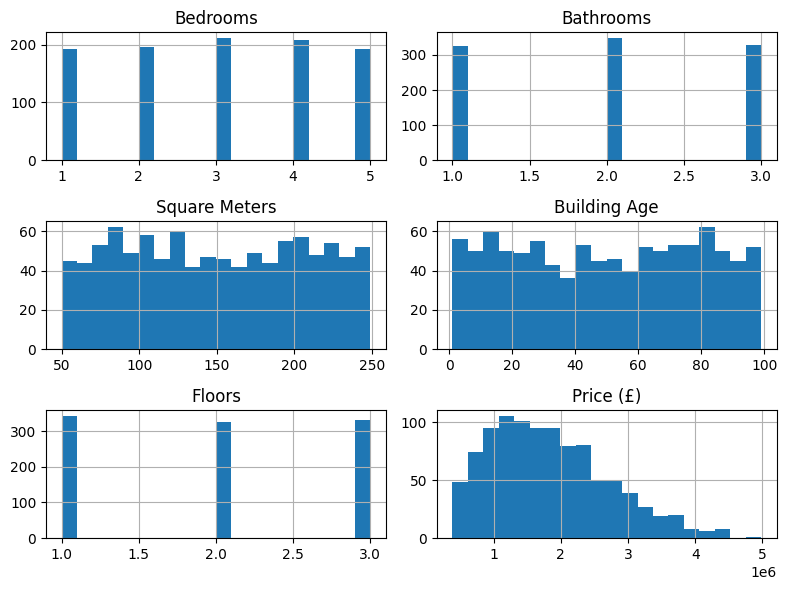

In [29]:
d.hist(bins=20,figsize=(8,6))
plt.tight_layout()
plt.show()

In [30]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Neighborhood     1000 non-null   object
 1   Bedrooms         1000 non-null   int64 
 2   Bathrooms        1000 non-null   int64 
 3   Square Meters    1000 non-null   int64 
 4   Building Age     1000 non-null   int64 
 5   Garden           1000 non-null   object
 6   Garage           1000 non-null   object
 7   Floors           1000 non-null   int64 
 8   Property Type    1000 non-null   object
 9   Heating Type     1000 non-null   object
 10  Balcony          1000 non-null   object
 11  Interior Style   1000 non-null   object
 12  View             1000 non-null   object
 13  Materials        1000 non-null   object
 14  Building Status  1000 non-null   object
 15  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 125.1+ KB


In [32]:
d.columns

Index(['Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters',
       'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type',
       'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials',
       'Building Status', 'Price (£)'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# selecting the categorical columns
cat=d.select_dtypes(include=['object']).columns
# applying label encoder to each categorical columns
for col in cat:
  d[col]=le.fit_transform(d[col])


In [36]:
# Convert all columns to integer using applymap
d = d.applymap(lambda x: int(x))



In [37]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Neighborhood     1000 non-null   int64
 1   Bedrooms         1000 non-null   int64
 2   Bathrooms        1000 non-null   int64
 3   Square Meters    1000 non-null   int64
 4   Building Age     1000 non-null   int64
 5   Garden           1000 non-null   int64
 6   Garage           1000 non-null   int64
 7   Floors           1000 non-null   int64
 8   Property Type    1000 non-null   int64
 9   Heating Type     1000 non-null   int64
 10  Balcony          1000 non-null   int64
 11  Interior Style   1000 non-null   int64
 12  View             1000 non-null   int64
 13  Materials        1000 non-null   int64
 14  Building Status  1000 non-null   int64
 15  Price (£)        1000 non-null   int64
dtypes: int64(16)
memory usage: 125.1 KB


In [63]:
from sklearn.model_selection import train_test_split
x=d.drop(['Price (£)'],axis=1)
y=d[['Price (£)']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [66]:
from sklearn.metrics import r2_score
# Evaluate the model
initial_r2_score = r2_score(y_test, y_pred)
print("Initial r2_score:\n",initial_r2_score)



Initial r2_score:
 0.6519396093395478


In [67]:
from sklearn.preprocessing import PolynomialFeatures

# Example of using Polynomial Regression:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression().fit(x_train_poly, y_train)
r2_score(y_test,model.predict(x_test_poly))

0.7273767930384282

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.8502687879496946

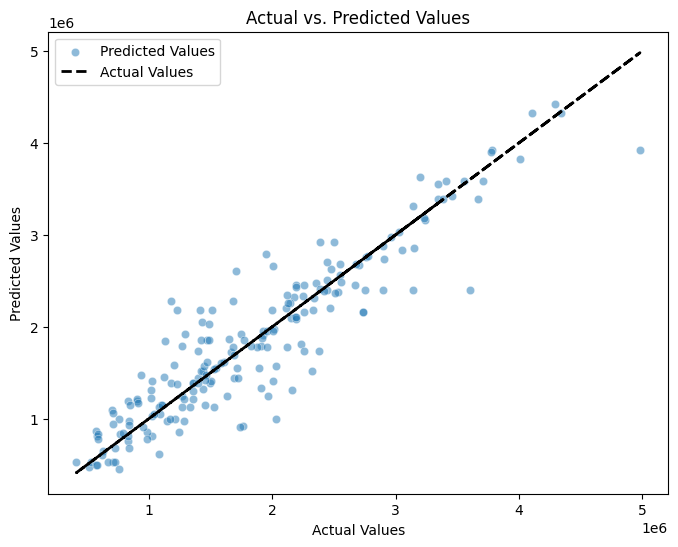

In [75]:

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))

# Plot predicted values with a label for the legend
sns.scatterplot(x=y_test['Price (£)'], y=y_pred, alpha=0.5, label='Predicted Values')

# Plot actual values (as a line) with a label for the legend
plt.plot(y_test['Price (£)'], y_test['Price (£)'], 'k--', lw=2, label='Actual Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add the legend
plt.legend()

plt.show()